## Estadística Aplicada
Sesión 6 - 24 agosto

Alexandra Guadalupe Valdez Mireles 1910361 Gpo 44

In [2]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Librerías especializadas
import statsmodels.formula.api as smf

In [3]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ----------------- -------------------- 112.6/250.0 kB 3.2 MB/s eta 0:00:01
     ---------------------------------- --- 225.3/250.0 kB 2.7 MB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\FCFM\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
### Cargar los datos
datos = pd.read_excel('modelolineal.xlsx')

In [6]:
datos = datos[['X','Y']]

## Ejecutar una regresión de Minimos Cuadrados MCO

In [7]:
## Estadísticas descriptivas
datos.describe()

,X,Y
count,30.000000,30.000000
mean,17.333333,19.038965
std,8.372094,5.689742
min,0.000000,6.808838
25%,12.250000,14.128834
50%,19.000000,19.937977
75%,23.000000,24.151130
max,29.000000,28.422786


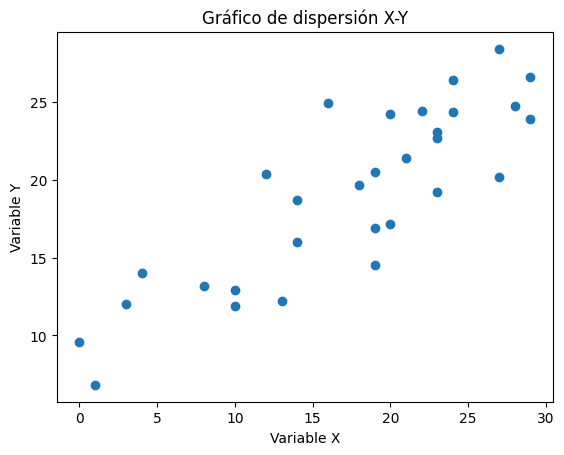

In [9]:
## Exploración visual (graficar)
plt.scatter(datos['X'], datos['Y'])
plt.title('Gráfico de dispersión X-Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

El gráfico de dispersión muestra una relación lineal de X-Y por tanto tiene sentido estimar  un modelo de MCO 

In [10]:
##Estimar modelo (foto conclusión)
## 1 Especificar el modelo
reg = smf.ols(formula='Y~X', data=datos)
## 2 Estimar el modelo
results = reg.fit()
## 3 Decirle a Python que nos lo muestre
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        10:50:21   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

Apuntes Sesión 6 en libreta

In [11]:
## Calcular MAD
## Primero calcular la Y estimada
datos['Y_hat'] = results.predict(datos['X'])

In [13]:
datos.head()

,X,Y,Y_hat
0,23,19.246957,22.333385
1,19,16.878501,20.007912
2,27,20.187237,24.658857
3,13,12.176789,16.519703
4,21,21.420112,21.170648


In [17]:
datos['X2'] = datos['X']**2

In [14]:
# MAD
MAD_m1 = (datos['Y']-datos['Y_hat']).abs().mean()

In [15]:
MAD_m1

2.3543034803789946

In [18]:
datos

,X,Y,Y_hat,X2
0,23,19.246957,22.333385,529
1,19,16.878501,20.007912,361
2,27,20.187237,24.658857,729
3,13,12.176789,16.519703,169
4,21,21.420112,21.170648,441
5,22,24.436799,21.752016,484
6,19,14.507928,20.007912,361
7,14,16.013496,17.101071,196
8,3,12.043514,10.706022,9
9,1,6.808838,9.543286,1


Estimar $ Y = \beta_0 + \beta_1X + \beta_2X^2 $

In [20]:
## Especificar modelo
reg2 = smf.ols(formula='Y~X+X2', data=datos)
# estimamos
results2 = reg2.fit()
# mostramos
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.92e-08
Time:                        11:17:37   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

In [21]:
datos ['Y_hat2'] = results2.predict(datos[['X','X2']])

In [22]:
datos.head()

,X,Y,Y_hat,X2,Y_hat2
0,23,19.246957,22.333385,529,22.340436
1,19,16.878501,20.007912,361,20.049010
2,27,20.187237,24.658857,729,24.608946
3,13,12.176789,16.519703,169,16.568905
4,21,21.420112,21.170648,441,21.197588


In [23]:
MAD_m2 = (datos['Y']-datos['Y_hat2']).abs().mean()

In [25]:
print(MAD_m1.round(3), MAD_m2.round(3))

2.354 2.355


De acuerdo con el MAD el mejor modelo es el modelo 1 : $ Y = \beta_0 + \beta_1 X $

## Validación Cruzada

In [28]:
datos = pd.read_excel('modelolineal.xlsx')
datos = datos[['X','Y']]

In [29]:
## Definir conjunto de entrenamiento
train_set = datos.iloc[:20]
# Conjunto de evaluación
test_set = datos.loc[20:]

In [30]:
test_set

,X,Y
20,0,9.544102
21,20,24.230330
22,24,26.417826
23,23,23.066723
24,8,13.145005
25,24,24.385156
26,10,12.934102
27,4,14.002469
28,29,26.599047
29,10,11.910387


In [32]:
## Estimamos modelo con conj entrenamiento
## especificación
reg3 = smf.ols(formula='Y~X', data=train_set)
## estimación
results3 = reg3.fit()
## mostrar modelo
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     28.80
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           4.23e-05
Time:                        11:55:38   Log-Likelihood:                -51.332
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2336      2.008      4.598      0.0

In [34]:
results3.params[1]

0.5441903879851915

In [36]:
## Evaluamos el modelo con el conjunto de evaluación 
test_set['Y_hat'] = results3.params[0] + results3.params[1]*test_set['X']

C:\Users\FCFM\AppData\Local\Temp\ipykernel_7844\756432001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat'] = results3.params[0] + results3.params[1]*test_set['X']


In [37]:
test_set

,X,Y,Y_hat
20,0,9.544102,9.233587
21,20,24.230330,20.117395
22,24,26.417826,22.294157
23,23,23.066723,21.749966
24,8,13.145005,13.587110
25,24,24.385156,22.294157
26,10,12.934102,14.675491
27,4,14.002469,11.410349
28,29,26.599047,25.015109
29,10,11.910387,14.675491


In [38]:
## calcular MAD
MAD_ts1 = (test_set['Y']-test_set['Y_hat']).abs().mean()

In [39]:
MAD_ts1

2.107953156470991

In [40]:
# Crear el cuadrado
train_set['X2'] = train_set['X'] ** 2
test_set['X2'] = test_set['X'] ** 2

## Estimar y=b+b1x+b2x2
reg4 = smf.ols(formula='Y~X+X2', data=train_set)
results4 = reg4.fit()

# Calculamos estimado
test_set['Y_hat2'] = results4.params[0] + results4.params[1] * test_set['X'] + results4.params[2]*test_set['X2']

## Calculamos MAD
MAD_ts2 = (test_set['Y']-test_set['Y_hat2']).abs().mean()

C:\Users\FCFM\AppData\Local\Temp\ipykernel_7844\3650192266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['X2'] = train_set['X'] ** 2
C:\Users\FCFM\AppData\Local\Temp\ipykernel_7844\3650192266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['X2'] = test_set['X'] ** 2
C:\Users\FCFM\AppData\Local\Temp\ipykernel_7844\3650192266.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [42]:
print(MAD_ts1.round(3), MAD_ts2.round(3))

2.108 2.334


 $ Y = \beta_0 + \beta_1 X $ es mejor modelo que $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 $ de acuerdo a MAD y utilizando validación cruzada